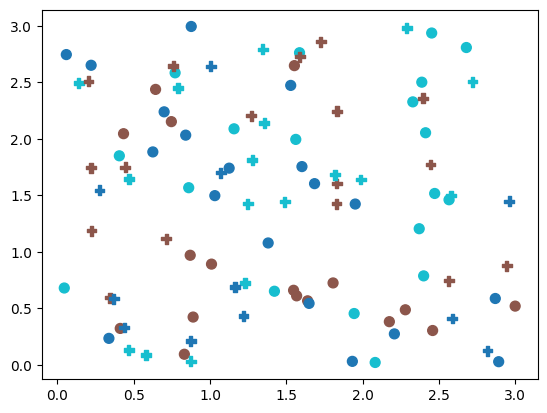

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def scatter_plot_animation(tsne, labels, attributes, markers):
    fig, ax = plt.subplots()

    # Get unique attributes
    unique_attributes = np.unique(attributes)

    # Create a dictionary to store scatter plot objects for each attribute
    scatter_plots = {}

    for attr in unique_attributes:
        # Filter tsne and labels based on attribute
        tsne_attr = tsne[attributes == attr]
        labels_attr = labels[attributes == attr]

        # Scatter plot for current attribute
        scatter_plots[attr] = ax.scatter(tsne_attr[:, 0, 0], tsne_attr[:, 1, 0], s=50, marker=markers[attr], c=labels_attr, cmap='tab10')

    # ax.legend()

    def update(frame):
        for attr, scatter_plot in scatter_plots.items():
            # Filter tsne based on attribute and update scatter plot
            tsne_attr = tsne[attributes == attr]
            x = tsne_attr[:, 0, frame]
            y = tsne_attr[:, 1, frame]
            data = np.stack([x, y]).T
            scatter_plot.set_offsets(data)

        return list(scatter_plots.values())

    ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=100)
    
    return ani

# Example usage:
# Generate random data for demonstration
tsne = np.random.rand(100, 2, 40) * 3  # 100 samples, 2 features each, 40 epochs
labels = np.random.randint(0, 3, size=100)
attributes = np.random.randint(0, 2, size=100)
markers = ['o', 'P']

ani = scatter_plot_animation(tsne, labels, attributes, markers)

plt.show()

In [11]:
ani.save(filename="colored_hue.gif", writer="pillow")